In [1]:
# change into root directory to the project
import os
if os.getcwd().split("/")[-1] == "examples":
    print("chdir")
    os.chdir('..')

chdir


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [3]:
import pypet
import numpy as np
import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel

from neurolib.optimize.exploration import BoxSearch

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

In [4]:
aln = ALNModel()

INFO:root:Model aln created


In [5]:
parameters = {'mue_ext_mean' : np.linspace(0, 3, 2).tolist(),
              'mui_ext_mean' : np.linspace(0, 3, 2).tolist()}
search = BoxSearch(aln, parameters)
search.initializeExploration()

INFO:root:Number of parameter configurations: 4
INFO:root:Number of processes: 8
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$', 'crun')`.
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$set', 'crunset')`.
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/parameter.py:884: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(dtype, np.str):
MainProcess root INFO     Pypet environment initialized.


In [6]:
search.run()

MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-02-03-01H-52M-49S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-02-03-01H-52M-49S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-02-03-01H-52M-49S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-02-03-01H-52M-49S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `resu

In [7]:
search.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/exploration.hdf
MainProcess root INFO     Analyzing trajectory results-2020-02-03-01H-52M-49S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/exploration.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-02-03-01H-52M-49S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.
MainProcess root INFO     Creating pandas dataframe ...
MainProcess root INFO     Creating results dictionary ...
100%|██████████| 4/4 [00:00<00:00, 140.96it/s]
MainProcess root INFO     All results loaded.


In [8]:
print("Number of results: {}".format(len(search.results)))

Number of results: 4


In [9]:
# Example analysis of the results
# The .results attribute is a list and can be indexed by the run 
# number (which is also the index of the pandas dataframe .dfResults).
# Here we compute the maximum firing rate of the node in the last second
# and add the result (a float) to the pandas dataframe.
for i in search.dfResults.index:
    search.dfResults.loc[i, 'max_r'] = np.max(search.results[i]['rates_exc'][:, -int(1000/aln.params['dt']):])

Text(0, 0.5, 'Input to I')

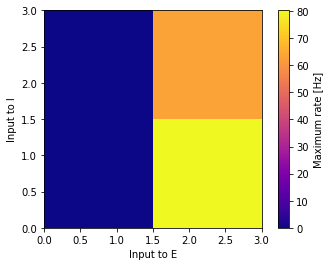

In [10]:
plt.imshow(search.dfResults.pivot_table(values='max_r', index = 'mui_ext_mean', columns='mue_ext_mean'), \
           extent = [min(search.dfResults.mue_ext_mean), max(search.dfResults.mue_ext_mean),
                     min(search.dfResults.mui_ext_mean), max(search.dfResults.mui_ext_mean)], origin='lower')
plt.colorbar(label='Maximum rate [Hz]')
plt.xlabel("Input to E")
plt.ylabel("Input to I")